In [1]:
import math
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts

%matplotlib inline

Получим выборку с номральным распределением

In [2]:
sample_μ = 1050
sample_σ = 100
count = 1000

norm_rv = sts.norm(sample_μ, sample_σ)
sample = norm_rv.rvs(count)

In [3]:
def get_normal_distribution(x, μ, σ):
    """
    Получение нормального распределения
    """
    return pow(math.e, -1*pow((x-μ), 2) / (2* pow(σ, 2) )) / (σ * math.sqrt(2*math.pi))

Получим идеальное нормальное распределение

In [4]:
x = np.linspace(min(sample), max(sample), count)
normal_distribution = partial(get_normal_distribution, μ=sample_μ, σ=sample_σ)
y = list(map(normal_distribution, x))

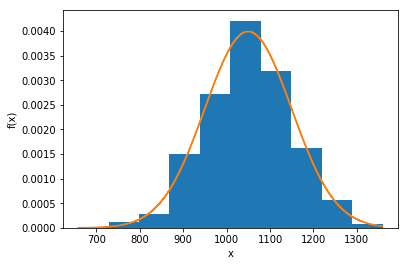

In [5]:
plt.hist(sample, density=True)  # density = normed
plt.step(x, y)
plt.xlabel('x')
plt.ylabel('f(x)');

In [6]:
def generate_means_chart(n, μ=sample_μ, σ=sample_σ, count_samples=count):
    """
    Генерация графика гистограммы для выборочных средних случайной величины
    
    n: количество элементов в выборке
    μ: мат ожидание / среднее значение
    σ: стандартное отклонение
    count_samples: количество выборок
    """
    norm_rv = sts.norm(μ, σ)
    means = [np.mean(norm_rv.rvs(n)) for _ in range(count_samples)]

    means_μ = sum(means) / count_samples
    means_DX = sum(pow((number - means_μ), 2) for number in means)
    means_σ = math.sqrt(means_DX / count_samples)
    
    x = np.linspace(min(means), max(means), count_samples)
    normal_distribution = partial(get_normal_distribution, μ=means_μ, σ=means_σ)
    y = list(map(normal_distribution, x))

    plt.hist(means, density=True)
    plt.plot(x, y, linewidth=3)
    plt.xlabel('$\\bar{x}_n$')
    plt.ylabel('$f(\\bar{x}_n)$')
    plt.title('count_samples=%d, μ=%d, σ=%d' % (n, μ, σ))
    plt.show()

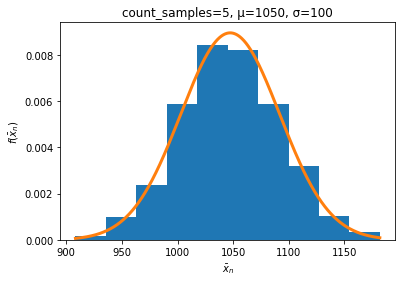

In [7]:
generate_means_chart(5)

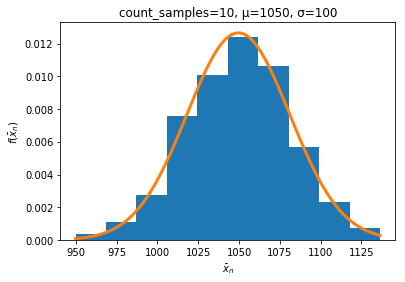

In [8]:
generate_means_chart(10)

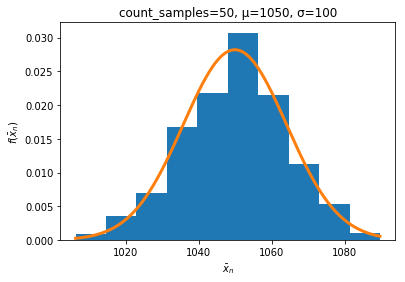

In [9]:
generate_means_chart(50)

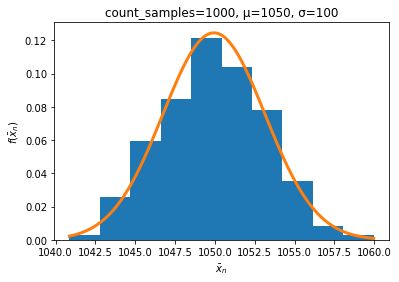

In [10]:
generate_means_chart(1000)

Чем больше количество элементов в выборке, тем он больше похож на нормальное распределение